# Adaptive networks Effect

## Setting up the simulation

In [133]:
# Enable auto-reloading
%reload_ext autoreload
# 2: Reload all
%autoreload 2

In [134]:
#import libraries
import sys
import pandas as pd
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['DGLBACKEND'] = 'pytorch'
from tqdm import tqdm

import polygraphs as pg
from polygraphs import ops 

In [135]:
#temporal configuration file
conf_path = '../configs/adaptive-test.yaml'

##let's do a check of the interval parameters
# Add the path to polygraphs module
sys.path.append('../polygraphs')

# test_yaml_loading.py
from polygraphs.hyperparameters import PolyGraphHyperParameters

# see is the interval is the one we want
params = PolyGraphHyperParameters.fromYAML(conf_path)

print("Params loaded from config:", params)

Params loaded from config: PolyGraphHyperParameters({
    "device": "cpu",
    "op": "AdaptivePolyGraphOp",
    "seed": 0,
    "epsilon": 0.0,
    "trials": 10,
    "lowerupper": 0.99,
    "upperlower": 0.5,
    "mistrust": 0.0,
    "antiupdating": false,
    "reliability": 1.0,
    "trust": 0.0,
    "unreliablenodes": [],
    "init": {
        "kind": "uniform",
        "uniform": {
            "lower": 0.0,
            "upper": 1.0
        },
        "gaussian": {
            "mean": 0.0,
            "std": 1.0,
            "lower": -2.0,
            "upper": 2.0,
            "attempts": 4
        },
        "constant": {
            "value": null
        },
        "beliefs": {},
        "type": "gaussian",
        "mean": 0.0,
        "std": 0.5
    },
    "logging": {
        "enabled": true,
        "interval": 1
    },
    "snapshots": {
        "enabled": false,
        "interval": 1,
        "messages": false
    },
    "network": {
        "kind": "random",
        "size": 30

In [136]:
params.alpha = 3
params.K = 2
params.adaptation_params['gamma'] = 3
params.activities['params']['powerlaw_alpha'] = 2.1


In [137]:

params.init.gaussian.mean = 0
params.init.type = 'gaussian'
params.init.gaussian.std = 0.5

print(params.simulation.results)
params.logging.enabled = False
params.simulation.results = None

params.dt = 0.005
params.simulation.steps = 10000


auto


In [138]:
print(params)

PolyGraphHyperParameters({
    "device": "cpu",
    "op": "AdaptivePolyGraphOp",
    "seed": 0,
    "epsilon": 0.0,
    "trials": 10,
    "lowerupper": 0.99,
    "upperlower": 0.5,
    "mistrust": 0.0,
    "antiupdating": false,
    "reliability": 1.0,
    "trust": 0.0,
    "unreliablenodes": [],
    "init": {
        "kind": "uniform",
        "uniform": {
            "lower": 0.0,
            "upper": 1.0
        },
        "gaussian": {
            "mean": 0.0,
            "std": 0.5,
            "lower": -2.0,
            "upper": 2.0,
            "attempts": 4
        },
        "constant": {
            "value": null
        },
        "beliefs": {},
        "type": "gaussian",
        "mean": 0.0,
        "std": 0.5
    },
    "logging": {
        "enabled": false,
        "interval": 1
    },
    "snapshots": {
        "enabled": false,
        "interval": 1,
        "messages": false
    },
    "network": {
        "kind": "random",
        "size": 300,
        "directed": fal

## Running 1 experiment


In [139]:
pg.random()
_ = pg.simulate(params)

average/std opinion initial 0.47620097 0.21757912635803223 0.7020183354616165
Running adaptive simulation step 1/10000
average/std opinion 0.014285101 0.039388698 -0.33962661027908325 0.35262303054332733
Running adaptive simulation step 101/10000
average/std opinion -0.009526653 0.024960019 -0.3886159211397171 0.33789291977882385
Running adaptive simulation step 201/10000
average/std opinion -0.029473394 0.02736569 -0.3450695350766182 0.26366591453552246
Running adaptive simulation step 301/10000
average/std opinion -0.0388003 0.0038850445 -0.2930380329489708 0.21587179601192474
Running adaptive simulation step 401/10000
average/std opinion -0.034385357 0.012346581 -0.25371093302965164 0.19908836111426353
Running adaptive simulation step 501/10000
average/std opinion -0.036892522 0.0054529794 -0.19925643503665924 0.17440974339842796
Running adaptive simulation step 601/10000
average/std opinion -0.040281933 -0.0032371047 -0.19070915505290031 0.15561222657561302
Running adaptive simulat

# Post-processing results


In [140]:
import pandas as pd
res_dir = '~/polygraphs-cache/adaptive-results/'
results_files = os.listdir(res_dir)

ts = []
for f in tqdm(results_files):
    file_path = res_dir+f
    fs = f.split('.')
    index = fs[0].split('_')[-1]
    ts.append(int(index))

ts = sorted(list(set(ts)))
print(ts)

100%|██████████| 20000/20000 [00:00<00:00, 2385227.90it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [141]:
import json
import networkx as nx
from networkx.readwrite import json_graph

def read_adjacency_file(file_path):
    """
    Reads the graph adjacency JSON file and returns the corresponding NetworkX graph.
    
    Parameters:
        file_path (str): The path to the adjacency JSON file.

    Returns:
        G (networkx.Graph): The reconstructed NetworkX graph.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Convert JSON data back to a NetworkX graph
    G = json_graph.adjacency_graph(data)
    
    return G

# Example usage
Gs = {}
Bs = {}

for f in tqdm(sorted(results_files)):
    file_path = res_dir+f
    fs = f.split('.')
    index = fs[0].split('_')[-1]
    if fs[-1]=='json':
        # 'edgelist_step_100.json'  # Replace with your actual file path
        Gs[int(index)] = read_adjacency_file(file_path)
    if fs[-1]=='npy':
        Bs[int(index)] = np.load(file_path)


100%|██████████| 20000/20000 [00:11<00:00, 1743.29it/s]


In [142]:
import pandas as pd

df = pd.DataFrame(Bs)
df.sort_index(axis=1, inplace=True)

In [143]:
df_mean = df.mean(axis=0)
df_median = df.median(axis=0)
df_bounds = df.quantile([0.75, 0.25], axis=0)

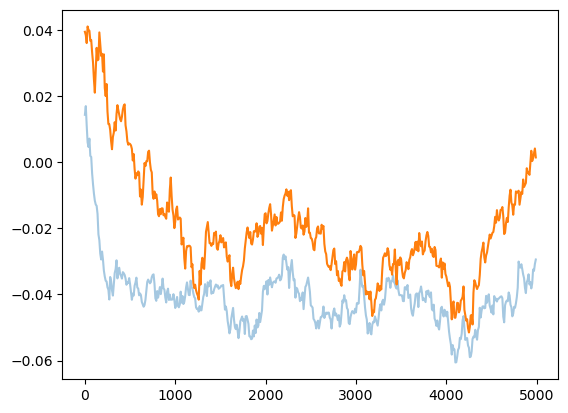

In [144]:
xs = range(0,5000,10)
plt.plot(xs, df_mean[xs], '-', alpha=.4);
plt.plot(xs, df_median[xs], '-');

# plt.fill_between(xs, df_bounds.iloc[0][xs], df_bounds.iloc[1][xs], alpha=.3)
    

In [145]:
df.shape

(300, 10000)

(-1.0, 1.0)

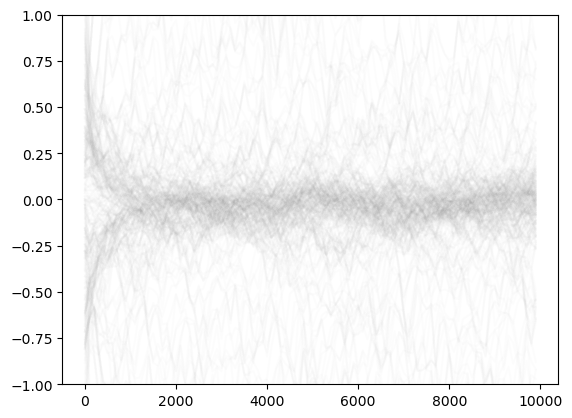

In [147]:
xs = range(0,10000,100)

plt.plot(df.iloc[:][xs].T, '-', color='gray', alpha=.02);
plt.ylim(-1,1)